In [0]:
##Using terminal commands to find my find files

%cd
!pwd
%cd ../content/drive/My\ Drive
!pwd
!ls

In [0]:
# unzip images
!tar -xvf data.tar.gz

## Reading images found from files

In [0]:
### Read path (through excel file)
import cv2
import csv
from matplotlib import pyplot as plt
%matplotlib inline

samples = []

with open('./data/driving_log.csv') as csvfile: #currently after extracting the file is present in this path
    reader = csv.reader(csvfile)    
    next(reader) #this is necessary to skip the first record as it contains the headings
    for line in reader:
        samples.append(line)

# take out single sample:
sample = samples[0]
## I only want the image file name which is the last of the path
name_center = './data/IMG/'+ sample[0].split('/')[-1]
name_left   = './data/IMG/'+ sample[1].split('/')[-1]
name_right  = './data/IMG/'+ sample[2].split('/')[-1]

# Read the images
center_image = cv2.cvtColor(cv2.imread(name_center), cv2.COLOR_BGR2RGB)
left_image = cv2.cvtColor(cv2.imread(name_left), cv2.COLOR_BGR2RGB)
right_image = cv2.cvtColor(cv2.imread(name_right), cv2.COLOR_BGR2RGB)



## Visualisation of images (Plotting)

Text(0.5, 1.0, 'right camera')

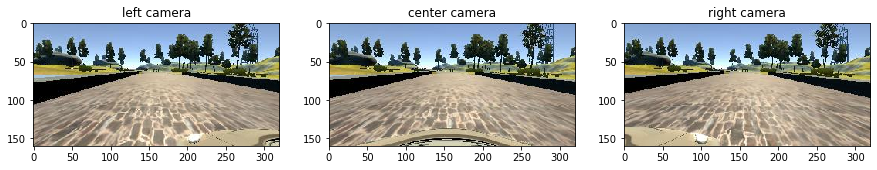

In [53]:
## Plotting out the images taken from the cameras
fig = plt.figure()
fig.set_size_inches(15, 10)

a = fig.add_subplot(1, 3, 1)
plt.imshow(left_image)
a.set_title('left camera')

a = fig.add_subplot(1, 3, 2)
plt.imshow(center_image)
a.set_title('center camera')

a = fig.add_subplot(1, 3, 3)
plt.imshow(right_image)
a.set_title('right camera')

## Cropping 

Note that the important information for the car is the road, we can crop out some portion of the bottom
and the top part of the image.

Cropping is done through Keras API. I will do a sample crop image here for visualisation purposes.


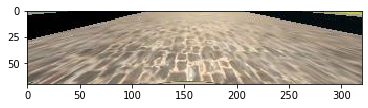

In [54]:
import numpy as np

center = np.copy(center_image)

center = center[70:140][:]

plt.imshow(center)

## Display Model Architecture (Go down for the Summary)


In [51]:

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense , Cropping2D
from keras.layers import Flatten, Dropout , BatchNormalization , Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D

def NvidiaModel():
    
  model = Sequential()
  
  model.add(Lambda(lambda x: (x/255.0)-0.5 , input_shape = (160,320,3)))
  model.add(Cropping2D(cropping=( (70, 20), (0, 0) )))

  model.add(Conv2D(24,  (5,5), strides=(2, 2),activation = 'relu'))
  model.add(Conv2D(36,  (5,5), strides=(2, 2), activation = 'relu'))
  model.add(Conv2D(48,  (5,5), strides=(2, 2),activation = 'relu'))

  model.add(Conv2D(64,  (3,3), activation = 'relu'))
  model.add(Conv2D(64,  (3,3), activation = 'relu'))
  model.add(Dropout(0.5))
  

  model.add(Flatten())
  model.add(Dense(100,activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss='mse')

  return model


model = NvidiaModel()
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 70, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 37, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 35, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 2, 33, 64)        

Training was done using Udacity local GPU. Please do check out `model.py` as it is the file I run the training of the model on. 